In [1]:
from adler.dataclasses.AdlerPlanetoid import AdlerPlanetoid
from adler.science.PhaseCurve import PhaseCurve

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import astropy.units as u

In [2]:
# ssObjectId of object to analyse
ssoid = "8268570668335894776"

In [3]:
# retrieve the object data via adler
# here we use an offline SQL database which contains the observations of the sso
fname = "../tests/data/testing_database.db"
planetoid = AdlerPlanetoid.construct_from_SQL(ssoid,sql_filename = fname)

In [4]:
# inspect the object
# planetoid.__dict__

{'ssObjectId': '8268570668335894776',
 'filter_list': ['u', 'g', 'r', 'i', 'z', 'y'],
 'date_range': [60000.0, 67300.0],
 'observations_by_filter': [Observations(ssObjectId='8268570668335894776', filter_name='u', mag=array([], dtype=object), magErr=array([], dtype=object), midpointMjdTai=array([], dtype=object), ra=array([], dtype=object), dec=array([], dtype=object), phaseAngle=array([], dtype=object), topocentricDist=array([], dtype=object), heliocentricDist=array([], dtype=object), reduced_mag=array([], dtype=object), num_obs=0),
  Observations(ssObjectId='8268570668335894776', filter_name='g', mag=array([21.33099937, 22.67099953, 23.5359993 , 22.85000038, 22.97599983,
         22.94499969, 23.13599968, 23.19400024, 23.1609993 ]), magErr=array([0.033, 0.07 , 0.141, 0.075, 0.048, 0.046, 0.068, 0.065, 0.066]), midpointMjdTai=array([62379.03985, 62414.11171, 63534.06359, 61323.17176, 60228.05559,
         60228.05606, 60229.03603, 60231.05795, 60233.03832]), ra=array([255.2300797, 304.

In [5]:
planetoid.SSObject.__dict__

{'ssObjectId': '8268570668335894776',
 'filter_list': ['u', 'g', 'r', 'i', 'z', 'y'],
 'discoverySubmissionDate': 60218.0,
 'firstObservationDate': 60220.01958,
 'arc': 3342.05859375,
 'numObs': 94,
 'H': array([        nan, 20.29232597, 19.80589294, 19.47262955, 19.59087944,
                nan]),
 'G12': array([       nan, 1.72339332, 1.52932608, 1.7948637 , 1.70006168,
               nan]),
 'Herr': array([       nan, 0.0302103 , 0.01974303, 0.02164448, 0.04272443,
               nan]),
 'G12err': array([       nan, 0.04049731, 0.05071714, 0.04562044, 0.09607928,
               nan]),
 'nData': array([ 0.,  9., 38., 32., 15.,  0.]),
 'maxExtendedness': 0.0,
 'minExtendedness': 0.0,
 'medianExtendedness': 0.0}

In [6]:
obs_r = planetoid.observations_in_filter("r")

In [7]:
obs_r.__dict__

{'ssObjectId': '8268570668335894776',
 'filter_name': 'r',
 'mag': array([21.91399956, 21.98600006, 21.75900078, 22.09399986, 21.61499977,
        21.72800064, 21.72200012, 20.4470005 , 21.78899956, 21.95899963,
        22.17900085, 22.44499969, 22.38999939, 22.92399979, 22.24799919,
        22.27599907, 22.29100037, 22.66200066, 22.69799995, 23.93300056,
        23.74200058, 22.14299965, 22.16799927, 22.24900055, 22.28499985,
        22.26199913, 22.44000053, 23.56800079, 23.70199966, 24.19499969,
        22.22900009, 22.04899979, 22.17700005, 23.52199936, 23.70199966,
        22.88699913, 23.06800079, 24.24200058]),
 'magErr': array([0.095     , 0.049     , 0.07      , 0.047     , 0.036     ,
        0.038     , 0.034     , 0.011     , 0.052     , 0.06      ,
        0.042     , 0.098     , 0.1       , 0.116     , 0.046     ,
        0.06      , 0.082     , 0.083     , 0.063     , 0.35100001,
        0.2       , 0.057     , 0.034     , 0.036     , 0.054     ,
        0.051     , 0.04

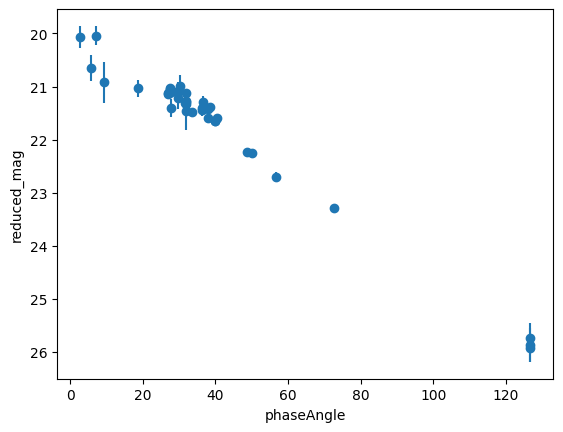

In [8]:
# plot the observations
x_plot = "phaseAngle"
y_plot = "reduced_mag"

x = getattr(obs_r, x_plot)
y = getattr(obs_r, y_plot)
xerr = obs_r.magErr

fig = plt.figure()
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0, 0])

ax1.errorbar(x, y, xerr, fmt="o")

ax1.invert_yaxis()
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

plt.show()

In [9]:
# define the phase curve

r_H = planetoid.SSObject.H[2]
r_G12 = planetoid.SSObject.G12[2]

pc = PhaseCurve(
    abs_mag=r_H * u.mag, phase_param=r_G12, model_name="HG12_Pen16"
)

/Users/jrobinson/miniconda3/envs/adler-dev/lib/python3.10/site-packages/sbpy/photometry/iau.py:50: InvalidPhaseFunctionWarning: G12 parameter could result in an invalid phsae function
  warnings.warn(msg, exception)


In [10]:
pc.model_function

<HG12_Pen16(H=19.80589294 mag, G12=1.52932608)>

In [11]:
alpha = np.linspace(0, np.amax(obs_r.phaseAngle)) * u.deg
alpha

<Quantity [  0.        ,   2.58757891,   5.17515782,   7.76273673,
            10.35031564,  12.93789455,  15.52547346,  18.11305237,
            20.70063128,  23.28821019,  25.8757891 ,  28.46336801,
            31.05094692,  33.63852583,  36.22610474,  38.81368365,
            41.40126256,  43.98884147,  46.57642038,  49.16399929,
            51.75157819,  54.3391571 ,  56.92673601,  59.51431492,
            62.10189383,  64.68947274,  67.27705165,  69.86463056,
            72.45220947,  75.03978838,  77.62736729,  80.2149462 ,
            82.80252511,  85.39010402,  87.97768293,  90.56526184,
            93.15284075,  95.74041966,  98.32799857, 100.91557748,
           103.50315639, 106.0907353 , 108.67831421, 111.26589312,
           113.85347203, 116.44105094, 119.02862985, 121.61620876,
           124.20378767, 126.79136658] deg>

In [12]:
red_mag = pc.ReducedMag(alpha)
red_mag

<Quantity [19.80589295, 19.92035462, 20.05205158, 20.20289499, 20.36056619,
           20.51314093, 20.6584576 , 20.79460082, 20.92025081, 21.03510523,
           21.14028241, 21.23864429, 21.33496854, 21.4328029 , 21.53235116,
           21.63356172, 21.73636196, 21.84065497, 21.94631645, 22.05319171,
           22.16109332, 22.26979979, 22.37905599, 22.48857609, 22.59803543,
           22.70697432, 22.81482593, 22.92096063, 23.02470165, 23.12535025,
           23.22222176, 23.31469242, 23.40225513, 23.48458066, 23.56157882,
           23.6334516 , 23.70029421, 23.761468  , 23.81627732, 23.86411552,
           23.9045047 , 23.9371306 , 23.96186796, 23.97879245, 23.98817765,
           23.99047722, 23.98629539, 23.97653042, 23.96457121, 23.95543471] mag>

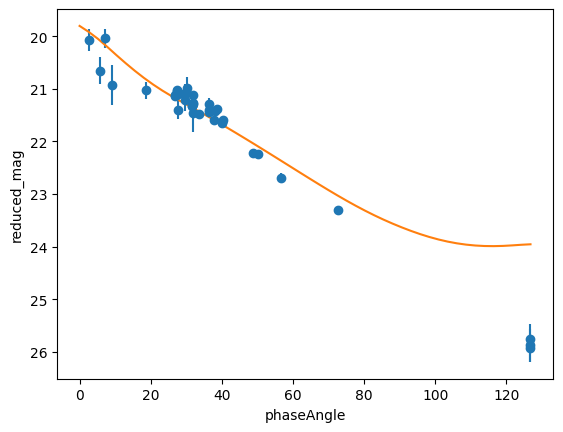

In [13]:
# %matplotlib widget

# plot the observations with the LSST phase curve
x_plot = "phaseAngle"
y_plot = "reduced_mag"

x = getattr(obs_r, x_plot)
y = getattr(obs_r, y_plot)
xerr = obs_r.magErr

fig = plt.figure()
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0, 0])

ax1.errorbar(x, y, xerr, fmt="o")

ax1.plot(alpha.value, red_mag.value)

ax1.invert_yaxis()
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

plt.show()

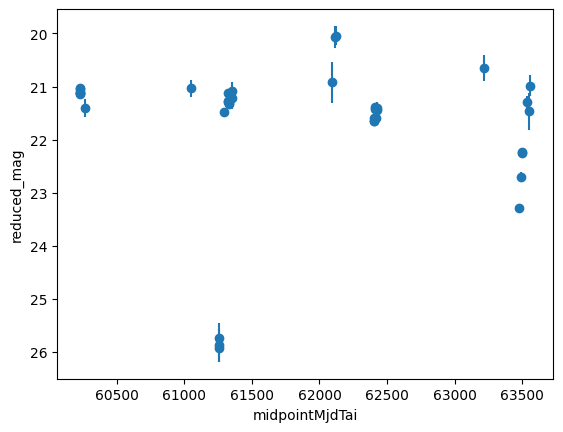

In [14]:
# plot the observations
x_plot = "midpointMjdTai"
y_plot = "reduced_mag"

x = getattr(obs_r, x_plot)
y = getattr(obs_r, y_plot)
xerr = obs_r.magErr

fig = plt.figure()
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0, 0])

ax1.errorbar(x, y, xerr, fmt="o")

ax1.invert_yaxis()
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

plt.show()

In [15]:
# do a different phase curve fit to the data
# adler should be able to fit different models, and perform more sophisticated fits

In [16]:
pc_fit = PhaseCurve(abs_mag=pc.abs_mag, model_name="HG")

In [17]:
pc_fit.model_function

<HG(H=19.80589294 mag, G=0.2)>

In [18]:
pc_fit.FitModel(
    phase_angle=obs_r.phaseAngle * u.deg,
    reduced_mag=obs_r.reduced_mag * u.mag,
    mag_err=obs_r.magErr * u.mag,
)

<HG(H=18.87964381 mag, G=-0.253 )>

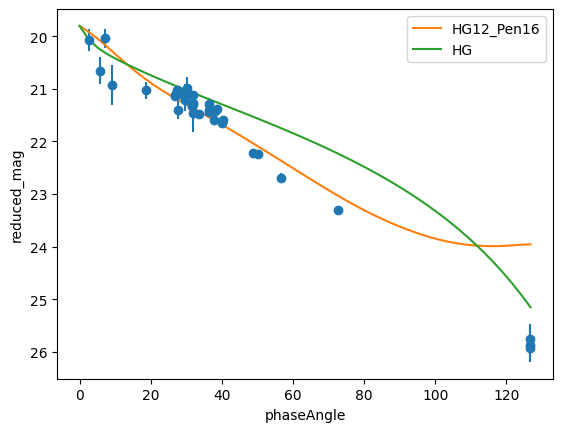

In [19]:
# %matplotlib widget

# plot the observations with the LSST phase curve
x_plot = "phaseAngle"
y_plot = "reduced_mag"

x = getattr(obs_r, x_plot)
y = getattr(obs_r, y_plot)
xerr = obs_r.magErr

fig = plt.figure()
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0, 0])

ax1.errorbar(x, y, xerr, fmt="o")

ax1.plot(alpha.value, pc.ReducedMag(alpha).value, label=pc.model_name)
ax1.plot(alpha.value, pc_fit.ReducedMag(alpha).value, label=pc_fit.model_name)

ax1.invert_yaxis()
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)
ax1.legend()

plt.show()

In [20]:
# # now we would add our calculated values back into planetoid
# planetoid.AdlerSchema.r_H = pc_fit.abs_mag
# planetoid.AdlerSchema.r_G = pc_fit.phase_param